In [2]:
import torch,sys,os
import pandas as pd
from torch import nn
from tqdm import tqdm
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from argparse import ArgumentParser
if "__file__" in globals():
    main_folder_path = os.path.abspath(os.path.join(os.path.dirname(__file__), ".."))
else:
    main_folder_path = os.path.abspath(os.path.join(os.getcwd(), ".."))
sys.path.append(main_folder_path)
os.makedirs('pictures', exist_ok=True)

from dataloaders.dataloaders import CSVsLoader
from algorithms.feature_CP import ConformalPredictionMethods
from algorithms.conformal import Conformal

parser = ArgumentParser()
parser.add_argument('--device', type=str, default='cuda:0', help='device to run the model on')
parser.add_argument('--DATASET_LIST',type=str,default=['WQ','CCS','PT','QFT','YH'])
parser.add_argument('--dataset', type=str, default='WQ')
parser.add_argument('--epochs', type=int, default=1000)
parser.add_argument('--WQ-epochs',type=int,default=1000)
parser.add_argument('--CCS-epochs',type=int,default=1000)
parser.add_argument('--PT-epochs',type=int,default=1000)
parser.add_argument('--QFT-epochs',type=int,default=1000)
parser.add_argument('--YH-epochs',type=int,default=1000)
args, unknown = parser.parse_known_args()
print(f"using device:{args.device}")

using device:cuda:0


testing on WQ:
Loaded full dataset WQ with shape: torch.Size([6497, 11]),torch.Size([6497])
Loaded split dataset WQ train shape: torch.Size([3248, 11]) test sizetorch.Size([3249, 11]) 
Loaded full dataset WQ with shape: torch.Size([6497, 11]),torch.Size([6497])
Loaded split dataset WQ train shape: torch.Size([3248, 11]) test sizetorch.Size([3249, 11]) 
Loaded full dataset WQ with shape: torch.Size([6497, 11]),torch.Size([6497])
Loaded split dataset WQ train shape: torch.Size([3248, 11]) test sizetorch.Size([3249, 11]) 
Loaded full dataset WQ with shape: torch.Size([6497, 11]),torch.Size([6497])
Loaded split dataset WQ train shape: torch.Size([3248, 11]) test sizetorch.Size([3249, 11]) 
Loaded full dataset WQ with shape: torch.Size([6497, 11]),torch.Size([6497])
Loaded split dataset WQ train shape: torch.Size([3248, 11]) test sizetorch.Size([3249, 11]) 
Loaded full dataset WQ with shape: torch.Size([6497, 11]),torch.Size([6497])
Loaded split dataset WQ train shape: torch.Size([3248, 11]

Results for WQ: [[0.9082794706063404, 2.358039308291744], [0.8990458602646968, 2.3654488194493304], [0.8830409356725146, 2.4033726761600924], [0.8971991381963681, 2.415212105189763], [0.8971991381963681, 2.417718158221824], [0.8975069252077562, 2.4243986789069307], [0.8931979070483226, 2.3855788434965373], [0.8858110187750077, 2.3731633798174503], [0.8956602031394275, 2.428761281738991], [0.9067405355493998, 2.4237496365356392]]
Results for CCS: [[0.8854368932038835, 35.818785262898686], [0.8776699029126214, 35.09592405819518], [0.8893203883495145, 33.68097773314847], [0.9009708737864077, 33.513868034232544], [0.8912621359223301, 33.98528723193178], [0.8737864077669902, 35.422140762888176], [0.8854368932038835, 32.550810458614436], [0.916504854368932, 36.78448387722334], [0.8912621359223301, 33.75616721376949], [0.916504854368932, 35.56559019675245]]
Results for PT: [[0.897208985704561, 0.27751727767382545], [0.9094622191967324, 0.28266078963302455], [0.8876786929884275, 0.294408627417

C:\Users\wangr\AppData\Local\Temp\ipykernel_19156\1696870143.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x="Dataset", y="Coverage", data=df_coverage, palette="Set2", linewidth=1.5)


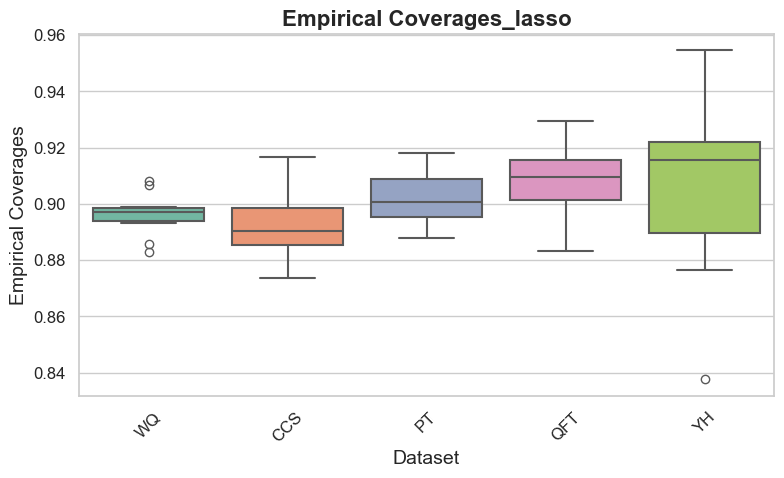

In [2]:
"""
change the method of regression.
lasso
linear
ridge
randomforest
CHANGE THE SAVED .CSV FILE NAMES, .PNG NAMES, .PNG TITLES TOO!
"""
DATASET_LIST = args.DATASET_LIST
repeat = 10
#make results dict
vanilla_results = {}
for dataset in DATASET_LIST:
    args.dataset = dataset
    dataset_results = []
    print(f"testing on {args.dataset}:")
    for _ in range(repeat):
        My_trainer = CSVsLoader(args)
        My_methods = ConformalPredictionMethods()
        My_trainer.load_full_data()
        My_trainer.load_split_data()
        Split_CP_QFT = Conformal(X0=My_trainer.X0.cpu(), y0=My_trainer.y0.cpu().numpy(), 
                         X00=My_trainer.X00.cpu().numpy(), 
                         y00=My_trainer.y00.cpu().numpy(), 
                         rho=0.5, alpha=0.1, weight=None, train_model="lasso") #CHANGE
        # record results
        coverage = np.mean(Split_CP_QFT.split_weight_conformal()[0])
        length = np.median(Split_CP_QFT.split_weight_conformal()[1])
        dataset_results.append([coverage,length])
    vanilla_results[dataset] = dataset_results
for dataset, results in vanilla_results.items():
    print(f"Results for {dataset}: {results}")
    
coverage_data = []
length_data = []
datasets = []
for dataset, results in vanilla_results.items():
    for coverage, length in results:
        coverage_data.append(coverage)
        length_data.append(length)
        datasets.append(dataset)
df_coverage = pd.DataFrame({
    'Coverage': coverage_data,
    'Dataset': datasets
})
df_length = pd.DataFrame({
    'length':length_data,
    'Dataset': datasets
})
df_coverage.to_csv('vanilla_coverage_lasso.csv', index=False) # CHANGE
df_length.to_csv('vanilla_length_lasso.csv', index=False) # CHANGE

sns.set(style='whitegrid',palette="muted")
plt.figure(figsize=(8, 8*0.618))
ax = sns.boxplot(x="Dataset", y="Coverage", data=df_coverage, palette="Set2", linewidth=1.5)
plt.title('Empirical Coverages_lasso', fontsize=16, fontweight='bold') #CHANGE
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
ax.set_xlabel('Dataset', fontsize=14)
ax.set_ylabel('Empirical Coverages', fontsize=14)
plt.tight_layout()
plt.savefig('pictures/vanilla_split_empirical_coverages_lasso.png') #CHANGE
plt.show()

In [10]:
import pandas as pd
lasso_length = pd.read_csv("vanilla_length_lasso.csv")
grouped = lasso_length.groupby('Dataset')['length'].agg(['mean', 'var']).reset_index()
grouped.rename(columns={'mean': 'Mean', 'var': 'Variance'}, inplace=True)
grouped

,Dataset,Mean,Variance
0,CCS,34.617403,1.713554
1,PT,0.281580,0.000045
2,QFT,4.408534,0.029766
3,WQ,2.399544,0.000714
4,YH,52.480176,115.764376


testing on WQ:
Loaded full dataset WQ with shape: torch.Size([6497, 11]),torch.Size([6497])
Loaded split dataset WQ train shape: torch.Size([3248, 11]) test sizetorch.Size([3249, 11]) 
Loaded full dataset WQ with shape: torch.Size([6497, 11]),torch.Size([6497])
Loaded split dataset WQ train shape: torch.Size([3248, 11]) test sizetorch.Size([3249, 11]) 
Loaded full dataset WQ with shape: torch.Size([6497, 11]),torch.Size([6497])
Loaded split dataset WQ train shape: torch.Size([3248, 11]) test sizetorch.Size([3249, 11]) 
Loaded full dataset WQ with shape: torch.Size([6497, 11]),torch.Size([6497])
Loaded split dataset WQ train shape: torch.Size([3248, 11]) test sizetorch.Size([3249, 11]) 
Loaded full dataset WQ with shape: torch.Size([6497, 11]),torch.Size([6497])
Loaded split dataset WQ train shape: torch.Size([3248, 11]) test sizetorch.Size([3249, 11]) 
Loaded full dataset WQ with shape: torch.Size([6497, 11]),torch.Size([6497])
Loaded split dataset WQ train shape: torch.Size([3248, 11]

C:\Users\wangr\AppData\Local\Temp\ipykernel_19156\541234455.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x="Dataset", y="Coverage", data=df_coverage, palette="Set2", linewidth=1.5)


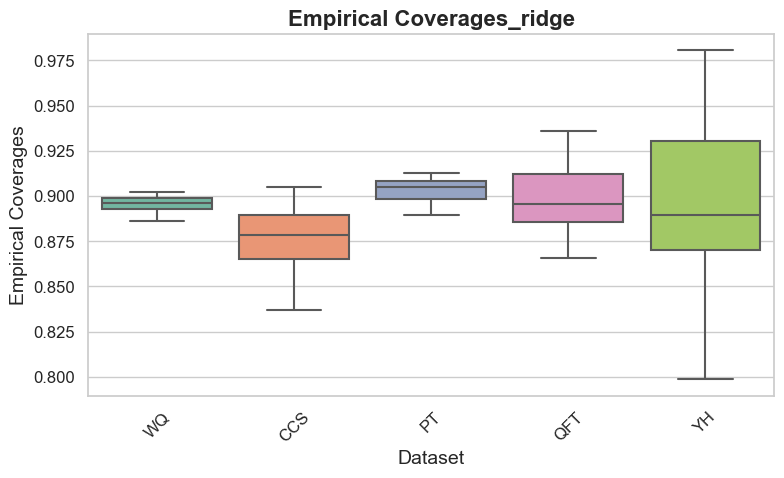

In [7]:
"""
change the method of regression.
ridge
randomforest
CHANGE THE SAVED .CSV FILE NAMES, .PNG NAMES, .PNG TITLES TOO!
"""
DATASET_LIST = args.DATASET_LIST
repeat = 10
#make results dict
vanilla_results = {}
for dataset in DATASET_LIST:
    args.dataset = dataset
    dataset_results = []
    print(f"testing on {args.dataset}:")
    for _ in range(repeat):
        My_trainer = CSVsLoader(args)
        My_methods = ConformalPredictionMethods()
        My_trainer.load_full_data()
        My_trainer.load_split_data()
        Split_CP_QFT = Conformal(X0=My_trainer.X0.cpu(), y0=My_trainer.y0.cpu().numpy(), 
                         X00=My_trainer.X00.cpu().numpy(), 
                         y00=My_trainer.y00.cpu().numpy(), 
                         rho=0.5, alpha=0.1, weight=None, train_model="ridge") #CHANGE
        # record results
        coverage = np.mean(Split_CP_QFT.split_weight_conformal()[0])
        length = np.median(Split_CP_QFT.split_weight_conformal()[1])
        dataset_results.append([coverage,length])
    vanilla_results[dataset] = dataset_results
for dataset, results in vanilla_results.items():
    print(f"Results for {dataset}: {results}")
    
coverage_data = []
length_data = []
datasets = []
for dataset, results in vanilla_results.items():
    for coverage, length in results:
        coverage_data.append(coverage)
        length_data.append(length)
        datasets.append(dataset)
df_coverage = pd.DataFrame({
    'Coverage': coverage_data,
    'Dataset': datasets
})
df_length = pd.DataFrame({
    'length':length_data,
    'Dataset': datasets
})
df_coverage.to_csv('vanilla_coverage_ridge.csv', index=False) # CHANGE
df_length.to_csv('vanilla_length_ridge.csv', index=False) # CHANGE

sns.set(style='whitegrid',palette="muted")
plt.figure(figsize=(8, 8*0.618))
ax = sns.boxplot(x="Dataset", y="Coverage", data=df_coverage, palette="Set2", linewidth=1.5)
plt.title('Empirical Coverages_ridge', fontsize=16, fontweight='bold') #CHANGE
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
ax.set_xlabel('Dataset', fontsize=14)
ax.set_ylabel('Empirical Coverages', fontsize=14)
plt.tight_layout()
plt.savefig('pictures/vanilla_split_empirical_coverages_ridge.png') #CHANGE
plt.show()

In [10]:
import pandas as pd
lasso_length = pd.read_csv("vanilla_length_ridge.csv")
grouped = lasso_length.groupby('Dataset')['length'].agg(['mean', 'std']).reset_index()
grouped.rename(columns={'mean': 'Mean', 'std': 'std'}, inplace=True)
grouped

,Dataset,Mean,std
0,CCS,34.868635,1.732188
1,PT,0.172081,0.002907
2,QFT,2.977609,0.255501
3,WQ,2.364232,0.059262
4,YH,38.458650,9.155012


testing on WQ:
Loaded full dataset WQ with shape: torch.Size([6497, 11]),torch.Size([6497])
Loaded split dataset WQ train shape: torch.Size([3248, 11]) test sizetorch.Size([3249, 11]) 
Loaded full dataset WQ with shape: torch.Size([6497, 11]),torch.Size([6497])
Loaded split dataset WQ train shape: torch.Size([3248, 11]) test sizetorch.Size([3249, 11]) 
Loaded full dataset WQ with shape: torch.Size([6497, 11]),torch.Size([6497])
Loaded split dataset WQ train shape: torch.Size([3248, 11]) test sizetorch.Size([3249, 11]) 
Loaded full dataset WQ with shape: torch.Size([6497, 11]),torch.Size([6497])
Loaded split dataset WQ train shape: torch.Size([3248, 11]) test sizetorch.Size([3249, 11]) 
Loaded full dataset WQ with shape: torch.Size([6497, 11]),torch.Size([6497])
Loaded split dataset WQ train shape: torch.Size([3248, 11]) test sizetorch.Size([3249, 11]) 
Loaded full dataset WQ with shape: torch.Size([6497, 11]),torch.Size([6497])
Loaded split dataset WQ train shape: torch.Size([3248, 11]

Loaded split dataset YH train shape: torch.Size([153, 6]) test sizetorch.Size([154, 6]) 
Results for WQ: [[0.8965835641735919, 2.3261642456054688], [0.9224376731301939, 2.416748046875], [0.9055093875038474, 2.3104171752929688], [0.9012003693444137, 2.3981399536132812], [0.8987380732533087, 2.264862060546875], [0.8965835641735919, 2.3442535400390625], [0.9153585718682672, 2.4401321411132812], [0.9162819329024315, 2.3745803833007812], [0.8913511849799939, 2.2802047729492188], [0.8848876577408433, 2.3941192626953125]]
Results for CCS: [[0.8893203883495145, 32.7291145324707], [0.8893203883495145, 35.15888214111328], [0.9184466019417475, 37.397430419921875], [0.8174757281553398, 33.55537414550781], [0.9281553398058252, 34.931304931640625], [0.887378640776699, 32.856231689453125], [0.8990291262135922, 34.51475524902344], [0.887378640776699, 35.18992233276367], [0.9262135922330097, 33.28028869628906], [0.9145631067961165, 33.68019104003906]]
Results for PT: [[0.8893805309734514, 0.13149431347

C:\Users\wangr\AppData\Local\Temp\ipykernel_19156\1775930891.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x="Dataset", y="Coverage", data=df_coverage, palette="Set2", linewidth=1.5)


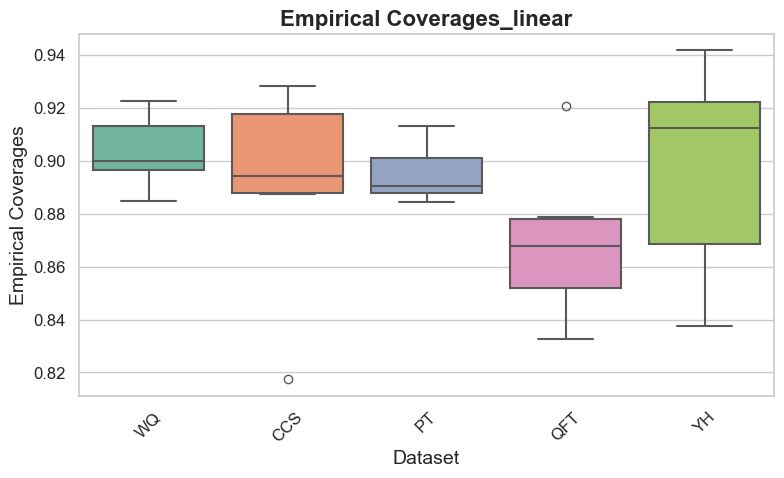

In [11]:
"""
change the method of regression.
ridge
randomforest
CHANGE THE SAVED .CSV FILE NAMES, .PNG NAMES, .PNG TITLES TOO!
"""
DATASET_LIST = args.DATASET_LIST
repeat = 10
#make results dict
vanilla_results = {}
for dataset in DATASET_LIST:
    args.dataset = dataset
    dataset_results = []
    print(f"testing on {args.dataset}:")
    for _ in range(repeat):
        My_trainer = CSVsLoader(args)
        My_methods = ConformalPredictionMethods()
        My_trainer.load_full_data()
        My_trainer.load_split_data()
        Split_CP_QFT = Conformal(X0=My_trainer.X0.cpu(), y0=My_trainer.y0.cpu().numpy(), 
                         X00=My_trainer.X00.cpu().numpy(), 
                         y00=My_trainer.y00.cpu().numpy(), 
                         rho=0.5, alpha=0.1, weight=None, train_model="linear") #CHANGE
        # record results
        coverage = np.mean(Split_CP_QFT.split_weight_conformal()[0])
        length = np.median(Split_CP_QFT.split_weight_conformal()[1])
        dataset_results.append([coverage,length])
    vanilla_results[dataset] = dataset_results
for dataset, results in vanilla_results.items():
    print(f"Results for {dataset}: {results}")
    
coverage_data = []
length_data = []
datasets = []
for dataset, results in vanilla_results.items():
    for coverage, length in results:
        coverage_data.append(coverage)
        length_data.append(length)
        datasets.append(dataset)
df_coverage = pd.DataFrame({
    'Coverage': coverage_data,
    'Dataset': datasets
})
df_length = pd.DataFrame({
    'length':length_data,
    'Dataset': datasets
})
df_coverage.to_csv('vanilla_coverage_linear.csv', index=False) # CHANGE
df_length.to_csv('vanilla_length_linear.csv', index=False) # CHANGE

sns.set(style='whitegrid',palette="muted")
plt.figure(figsize=(8, 8*0.618))
ax = sns.boxplot(x="Dataset", y="Coverage", data=df_coverage, palette="Set2", linewidth=1.5)
plt.title('Empirical Coverages_linear', fontsize=16, fontweight='bold') #CHANGE
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
ax.set_xlabel('Dataset', fontsize=14)
ax.set_ylabel('Empirical Coverages', fontsize=14)
plt.tight_layout()
plt.savefig('pictures/vanilla_split_empirical_coverages_linear.png') #CHANGE
plt.show()

In [12]:
import pandas as pd
lasso_length = pd.read_csv("vanilla_length_linear.csv")
grouped = lasso_length.groupby('Dataset')['length'].agg(['mean', 'var']).reset_index()
grouped.rename(columns={'mean': 'Mean', 'var': 'Variance'}, inplace=True)
grouped

,Dataset,Mean,Variance
0,CCS,34.329350,2.010040
1,PT,0.135635,0.000011
2,QFT,2.918809,0.073025
3,WQ,2.354962,0.003499
4,YH,24.506717,15.264043


In [9]:
import pandas as pd
cov = pd.read_csv("vanilla_coverage_linear.csv")
cov_group = cov.groupby('Dataset')['Coverage'].agg(['mean', 'var']).reset_index()
cov_group.rename(columns={'mean': 'Mean', 'var': 'Variance'}, inplace=True)
cov_group

,Dataset,Mean,Variance
0,CCS,0.895728,0.001023
1,PT,0.894350,0.000101
2,QFT,0.867841,0.000564
3,WQ,0.902893,0.000142
4,YH,0.900000,0.001286


testing on WQ:
Loaded full dataset WQ with shape: torch.Size([6497, 11]),torch.Size([6497])
Loaded split dataset WQ train shape: torch.Size([3248, 11]) test sizetorch.Size([3249, 11]) 


D:\Anaconda3\envs\torch_one\lib\site-packages\sklearn\linear_model\_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Anaconda3\envs\torch_one\lib\site-packages\sklearn\linear_model\_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Loaded full dataset WQ with shape: torch.Size([6497, 11]),torch.Size([6497])
Loaded split dataset WQ train shape: torch.Size([3248, 11]) test sizetorch.Size([3249, 11]) 


D:\Anaconda3\envs\torch_one\lib\site-packages\sklearn\linear_model\_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Anaconda3\envs\torch_one\lib\site-packages\sklearn\linear_model\_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Loaded full dataset WQ with shape: torch.Size([6497, 11]),torch.Size([6497])
Loaded split dataset WQ train shape: torch.Size([3248, 11]) test sizetorch.Size([3249, 11]) 


D:\Anaconda3\envs\torch_one\lib\site-packages\sklearn\linear_model\_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Anaconda3\envs\torch_one\lib\site-packages\sklearn\linear_model\_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Loaded full dataset WQ with shape: torch.Size([6497, 11]),torch.Size([6497])
Loaded split dataset WQ train shape: torch.Size([3248, 11]) test sizetorch.Size([3249, 11]) 


D:\Anaconda3\envs\torch_one\lib\site-packages\sklearn\linear_model\_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Anaconda3\envs\torch_one\lib\site-packages\sklearn\linear_model\_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Loaded full dataset WQ with shape: torch.Size([6497, 11]),torch.Size([6497])
Loaded split dataset WQ train shape: torch.Size([3248, 11]) test sizetorch.Size([3249, 11]) 


D:\Anaconda3\envs\torch_one\lib\site-packages\sklearn\linear_model\_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Anaconda3\envs\torch_one\lib\site-packages\sklearn\linear_model\_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Loaded full dataset WQ with shape: torch.Size([6497, 11]),torch.Size([6497])
Loaded split dataset WQ train shape: torch.Size([3248, 11]) test sizetorch.Size([3249, 11]) 


D:\Anaconda3\envs\torch_one\lib\site-packages\sklearn\linear_model\_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Anaconda3\envs\torch_one\lib\site-packages\sklearn\linear_model\_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Loaded full dataset WQ with shape: torch.Size([6497, 11]),torch.Size([6497])
Loaded split dataset WQ train shape: torch.Size([3248, 11]) test sizetorch.Size([3249, 11]) 


D:\Anaconda3\envs\torch_one\lib\site-packages\sklearn\linear_model\_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Anaconda3\envs\torch_one\lib\site-packages\sklearn\linear_model\_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Loaded full dataset WQ with shape: torch.Size([6497, 11]),torch.Size([6497])
Loaded split dataset WQ train shape: torch.Size([3248, 11]) test sizetorch.Size([3249, 11]) 


D:\Anaconda3\envs\torch_one\lib\site-packages\sklearn\linear_model\_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Anaconda3\envs\torch_one\lib\site-packages\sklearn\linear_model\_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Loaded full dataset WQ with shape: torch.Size([6497, 11]),torch.Size([6497])
Loaded split dataset WQ train shape: torch.Size([3248, 11]) test sizetorch.Size([3249, 11]) 


D:\Anaconda3\envs\torch_one\lib\site-packages\sklearn\linear_model\_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Anaconda3\envs\torch_one\lib\site-packages\sklearn\linear_model\_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Loaded full dataset WQ with shape: torch.Size([6497, 11]),torch.Size([6497])
Loaded split dataset WQ train shape: torch.Size([3248, 11]) test sizetorch.Size([3249, 11]) 


D:\Anaconda3\envs\torch_one\lib\site-packages\sklearn\linear_model\_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Anaconda3\envs\torch_one\lib\site-packages\sklearn\linear_model\_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


testing on CCS:
Loaded full dataset CCS with shape: torch.Size([1030, 8]),torch.Size([1030])
Loaded split dataset CCS train shape: torch.Size([515, 8]) test sizetorch.Size([515, 8]) 


D:\Anaconda3\envs\torch_one\lib\site-packages\sklearn\linear_model\_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Anaconda3\envs\torch_one\lib\site-packages\sklearn\linear_model\_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Loaded full dataset CCS with shape: torch.Size([1030, 8]),torch.Size([1030])
Loaded split dataset CCS train shape: torch.Size([515, 8]) test sizetorch.Size([515, 8]) 
Loaded full dataset CCS with shape: torch.Size([1030, 8]),torch.Size([1030])
Loaded split dataset CCS train shape: torch.Size([515, 8]) test sizetorch.Size([515, 8]) 


D:\Anaconda3\envs\torch_one\lib\site-packages\sklearn\linear_model\_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Anaconda3\envs\torch_one\lib\site-packages\sklearn\linear_model\_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Anaconda3\envs\torch_one\lib\site-packages\sklearn\linear_model\_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number o

Loaded full dataset CCS with shape: torch.Size([1030, 8]),torch.Size([1030])
Loaded split dataset CCS train shape: torch.Size([515, 8]) test sizetorch.Size([515, 8]) 


D:\Anaconda3\envs\torch_one\lib\site-packages\sklearn\linear_model\_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Loaded full dataset CCS with shape: torch.Size([1030, 8]),torch.Size([1030])
Loaded split dataset CCS train shape: torch.Size([515, 8]) test sizetorch.Size([515, 8]) 
Loaded full dataset CCS with shape: torch.Size([1030, 8]),torch.Size([1030])
Loaded split dataset CCS train shape: torch.Size([515, 8]) test sizetorch.Size([515, 8]) 


D:\Anaconda3\envs\torch_one\lib\site-packages\sklearn\linear_model\_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Anaconda3\envs\torch_one\lib\site-packages\sklearn\linear_model\_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Loaded full dataset CCS with shape: torch.Size([1030, 8]),torch.Size([1030])
Loaded split dataset CCS train shape: torch.Size([515, 8]) test sizetorch.Size([515, 8]) 
Loaded full dataset CCS with shape: torch.Size([1030, 8]),torch.Size([1030])
Loaded split dataset CCS train shape: torch.Size([515, 8]) test sizetorch.Size([515, 8]) 


D:\Anaconda3\envs\torch_one\lib\site-packages\sklearn\linear_model\_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Anaconda3\envs\torch_one\lib\site-packages\sklearn\linear_model\_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Anaconda3\envs\torch_one\lib\site-packages\sklearn\linear_model\_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number o

Loaded full dataset CCS with shape: torch.Size([1030, 8]),torch.Size([1030])
Loaded split dataset CCS train shape: torch.Size([515, 8]) test sizetorch.Size([515, 8]) 
Loaded full dataset CCS with shape: torch.Size([1030, 8]),torch.Size([1030])
Loaded split dataset CCS train shape: torch.Size([515, 8]) test sizetorch.Size([515, 8]) 


D:\Anaconda3\envs\torch_one\lib\site-packages\sklearn\linear_model\_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Anaconda3\envs\torch_one\lib\site-packages\sklearn\linear_model\_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Anaconda3\envs\torch_one\lib\site-packages\sklearn\linear_model\_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number o

testing on PT:
Loaded full dataset PT with shape: torch.Size([5875, 21]),torch.Size([5875])
Loaded split dataset PT train shape: torch.Size([2937, 21]) test sizetorch.Size([2938, 21]) 


D:\Anaconda3\envs\torch_one\lib\site-packages\sklearn\linear_model\_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Loaded full dataset PT with shape: torch.Size([5875, 21]),torch.Size([5875])
Loaded split dataset PT train shape: torch.Size([2937, 21]) test sizetorch.Size([2938, 21]) 


D:\Anaconda3\envs\torch_one\lib\site-packages\sklearn\linear_model\_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Anaconda3\envs\torch_one\lib\site-packages\sklearn\linear_model\_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Loaded full dataset PT with shape: torch.Size([5875, 21]),torch.Size([5875])
Loaded split dataset PT train shape: torch.Size([2937, 21]) test sizetorch.Size([2938, 21]) 


D:\Anaconda3\envs\torch_one\lib\site-packages\sklearn\linear_model\_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Anaconda3\envs\torch_one\lib\site-packages\sklearn\linear_model\_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Loaded full dataset PT with shape: torch.Size([5875, 21]),torch.Size([5875])
Loaded split dataset PT train shape: torch.Size([2937, 21]) test sizetorch.Size([2938, 21]) 


D:\Anaconda3\envs\torch_one\lib\site-packages\sklearn\linear_model\_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Anaconda3\envs\torch_one\lib\site-packages\sklearn\linear_model\_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Loaded full dataset PT with shape: torch.Size([5875, 21]),torch.Size([5875])
Loaded split dataset PT train shape: torch.Size([2937, 21]) test sizetorch.Size([2938, 21]) 


D:\Anaconda3\envs\torch_one\lib\site-packages\sklearn\linear_model\_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Anaconda3\envs\torch_one\lib\site-packages\sklearn\linear_model\_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Loaded full dataset PT with shape: torch.Size([5875, 21]),torch.Size([5875])
Loaded split dataset PT train shape: torch.Size([2937, 21]) test sizetorch.Size([2938, 21]) 


D:\Anaconda3\envs\torch_one\lib\site-packages\sklearn\linear_model\_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Anaconda3\envs\torch_one\lib\site-packages\sklearn\linear_model\_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Loaded full dataset PT with shape: torch.Size([5875, 21]),torch.Size([5875])
Loaded split dataset PT train shape: torch.Size([2937, 21]) test sizetorch.Size([2938, 21]) 


D:\Anaconda3\envs\torch_one\lib\site-packages\sklearn\linear_model\_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Anaconda3\envs\torch_one\lib\site-packages\sklearn\linear_model\_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Loaded full dataset PT with shape: torch.Size([5875, 21]),torch.Size([5875])
Loaded split dataset PT train shape: torch.Size([2937, 21]) test sizetorch.Size([2938, 21]) 


D:\Anaconda3\envs\torch_one\lib\site-packages\sklearn\linear_model\_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Anaconda3\envs\torch_one\lib\site-packages\sklearn\linear_model\_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Loaded full dataset PT with shape: torch.Size([5875, 21]),torch.Size([5875])
Loaded split dataset PT train shape: torch.Size([2937, 21]) test sizetorch.Size([2938, 21]) 


D:\Anaconda3\envs\torch_one\lib\site-packages\sklearn\linear_model\_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Anaconda3\envs\torch_one\lib\site-packages\sklearn\linear_model\_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Loaded full dataset PT with shape: torch.Size([5875, 21]),torch.Size([5875])
Loaded split dataset PT train shape: torch.Size([2937, 21]) test sizetorch.Size([2938, 21]) 


D:\Anaconda3\envs\torch_one\lib\site-packages\sklearn\linear_model\_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Anaconda3\envs\torch_one\lib\site-packages\sklearn\linear_model\_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


testing on QFT:
Loaded full dataset QFT with shape: torch.Size([907, 6]),torch.Size([907])
Loaded split dataset QFT train shape: torch.Size([453, 6]) test sizetorch.Size([454, 6]) 
Loaded full dataset QFT with shape: torch.Size([907, 6]),torch.Size([907])
Loaded split dataset QFT train shape: torch.Size([453, 6]) test sizetorch.Size([454, 6]) 
Loaded full dataset QFT with shape: torch.Size([907, 6]),torch.Size([907])
Loaded split dataset QFT train shape: torch.Size([453, 6]) test sizetorch.Size([454, 6]) 
Loaded full dataset QFT with shape: torch.Size([907, 6]),torch.Size([907])
Loaded split dataset QFT train shape: torch.Size([453, 6]) test sizetorch.Size([454, 6]) 
Loaded full dataset QFT with shape: torch.Size([907, 6]),torch.Size([907])
Loaded split dataset QFT train shape: torch.Size([453, 6]) test sizetorch.Size([454, 6]) 
Loaded full dataset QFT with shape: torch.Size([907, 6]),torch.Size([907])
Loaded split dataset QFT train shape: torch.Size([453, 6]) test sizetorch.Size([454,

D:\Anaconda3\envs\torch_one\lib\site-packages\sklearn\linear_model\_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Anaconda3\envs\torch_one\lib\site-packages\sklearn\linear_model\_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Loaded full dataset YH with shape: torch.Size([307, 6]),torch.Size([307])
Loaded split dataset YH train shape: torch.Size([153, 6]) test sizetorch.Size([154, 6]) 
Loaded full dataset YH with shape: torch.Size([307, 6]),torch.Size([307])
Loaded split dataset YH train shape: torch.Size([153, 6]) test sizetorch.Size([154, 6]) 
Loaded full dataset YH with shape: torch.Size([307, 6]),torch.Size([307])
Loaded split dataset YH train shape: torch.Size([153, 6]) test sizetorch.Size([154, 6]) 
Loaded full dataset YH with shape: torch.Size([307, 6]),torch.Size([307])
Loaded split dataset YH train shape: torch.Size([153, 6]) test sizetorch.Size([154, 6]) 


D:\Anaconda3\envs\torch_one\lib\site-packages\sklearn\linear_model\_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Anaconda3\envs\torch_one\lib\site-packages\sklearn\linear_model\_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Anaconda3\envs\torch_one\lib\site-packages\sklearn\linear_model\_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number o

Loaded full dataset YH with shape: torch.Size([307, 6]),torch.Size([307])
Loaded split dataset YH train shape: torch.Size([153, 6]) test sizetorch.Size([154, 6]) 
Loaded full dataset YH with shape: torch.Size([307, 6]),torch.Size([307])
Loaded split dataset YH train shape: torch.Size([153, 6]) test sizetorch.Size([154, 6]) 
Loaded full dataset YH with shape: torch.Size([307, 6]),torch.Size([307])
Loaded split dataset YH train shape: torch.Size([153, 6]) test sizetorch.Size([154, 6]) 
Results for WQ: [[0.9064327485380117, 2.358443595911588], [0.9005847953216374, 2.490084514402554], [0.8978147122191443, 2.393472621317059], [0.9027393044013543, 2.3441610158013297], [0.9128962757771623, 2.3475252266839437], [0.9024315173899662, 2.419308359833048], [0.8873499538319483, 2.356481415824339], [0.8879655278547245, 2.3314899582754602], [0.9002770083102493, 2.5088646797713086], [0.9116651277316097, 2.4827777516984515]]
Results for CCS: [[0.8815533980582524, 34.2344048635359], [0.8912621359223301, 

D:\Anaconda3\envs\torch_one\lib\site-packages\sklearn\linear_model\_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Anaconda3\envs\torch_one\lib\site-packages\sklearn\linear_model\_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Anaconda3\envs\torch_one\lib\site-packages\sklearn\linear_model\_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number o

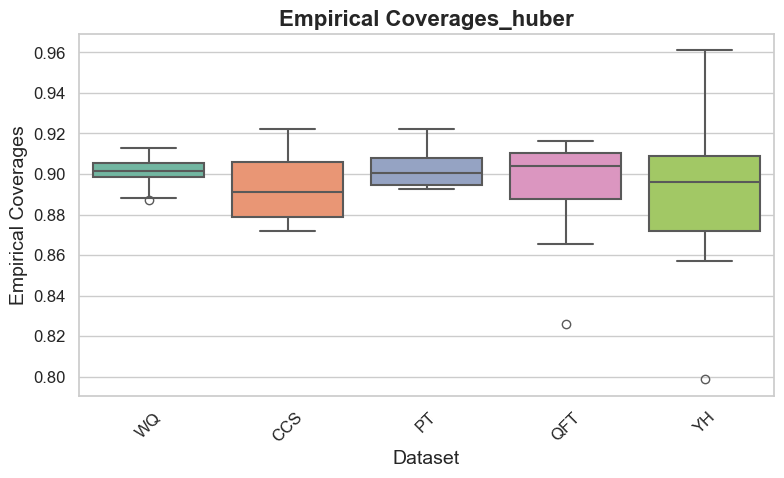

In [3]:
"""
change the method of regression.
ridge
randomforest
CHANGE THE SAVED .CSV FILE NAMES, .PNG NAMES, .PNG TITLES TOO!
"""
DATASET_LIST = args.DATASET_LIST
repeat = 10
#make results dict
vanilla_results = {}
for dataset in DATASET_LIST:
    args.dataset = dataset
    dataset_results = []
    print(f"testing on {args.dataset}:")
    for _ in range(repeat):
        My_trainer = CSVsLoader(args)
        My_methods = ConformalPredictionMethods()
        My_trainer.load_full_data()
        My_trainer.load_split_data()
        Split_CP_QFT = Conformal(X0=My_trainer.X0.cpu(), y0=My_trainer.y0.cpu().numpy(), 
                         X00=My_trainer.X00.cpu().numpy(), 
                         y00=My_trainer.y00.cpu().numpy(), 
                         rho=0.5, alpha=0.1, weight=None, train_model="huber") #CHANGE
        # record results
        coverage = np.mean(Split_CP_QFT.split_weight_conformal()[0])
        length = np.median(Split_CP_QFT.split_weight_conformal()[1])
        dataset_results.append([coverage,length])
    vanilla_results[dataset] = dataset_results
for dataset, results in vanilla_results.items():
    print(f"Results for {dataset}: {results}")
    
coverage_data = []
length_data = []
datasets = []
for dataset, results in vanilla_results.items():
    for coverage, length in results:
        coverage_data.append(coverage)
        length_data.append(length)
        datasets.append(dataset)
df_coverage = pd.DataFrame({
    'Coverage': coverage_data,
    'Dataset': datasets
})
df_length = pd.DataFrame({
    'length':length_data,
    'Dataset': datasets
})
df_coverage.to_csv('vanilla_coverage_huber.csv', index=False) # CHANGE
df_length.to_csv('vanilla_length_huber.csv', index=False) # CHANGE

sns.set(style='whitegrid',palette="muted")
plt.figure(figsize=(8, 8*0.618))
ax = sns.boxplot(x="Dataset", y="Coverage", data=df_coverage, palette="Set2", linewidth=1.5)
plt.title('Empirical Coverages_huber', fontsize=16, fontweight='bold') #CHANGE
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
ax.set_xlabel('Dataset', fontsize=14)
ax.set_ylabel('Empirical Coverages', fontsize=14)
plt.tight_layout()
plt.savefig('pictures/vanilla_split_empirical_coverages_huber.png') #CHANGE
plt.show()

In [4]:
import pandas as pd
lasso_length = pd.read_csv("vanilla_length_huber.csv")
grouped = lasso_length.groupby('Dataset')['length'].agg(['mean', 'var']).reset_index()
grouped.rename(columns={'mean': 'Mean', 'var': 'Variance'}, inplace=True)
grouped

,Dataset,Mean,Variance
0,CCS,35.062220,1.378369
1,PT,0.185135,0.000058
2,QFT,3.057721,0.017923
3,WQ,2.403261,0.004590
4,YH,34.007361,72.642139
